# Phase-2

# Problem Statement:

The Crimes in Boston dataset capturing the type of incident as well as when and where it occurred, a well-known dataset in the field of machine learning and data analysis, contains measurements of different fields of crime given by BPD.This project aims to perfrom an in-depth exploratory data (EDA) and statistical analysis of the crime dataset to gain insights into the characteristics of these incidents that are provided by Boston Police Department to initial details surrounding an incident to which BPD officers respond and capturing the type of incident as well as when and where it occurred in and make meaningful conclusions.

In [5]:
import pandas as pd

In [6]:
df = pd.read_csv('C:/Users/admin/Desktop/5DATASET/CRIMEB.csv' ,encoding='latin-1')
df.head(5)

C:\Users\admin\AppData\Local\Temp\ipykernel_10356\4037895019.py:1: DtypeWarning: Columns (0,2,3,4,5,6,7,10,12,13,16,17,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('C:/Users/admin/Desktop/5DATASET/CRIMEB.csv' ,encoding='latin-1')


,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location,DATE,AGE,Sex
0,I182080058,2403.0,Disorderly Conduct,DISTURBING THE PEACE,E18,495,NaN,03-10-2018 20.13,2018.0,10.0,Wednesday,20.0,Part Two,ARLINGTON ST,42.262608,-71.121186,"(42.26260773, -71.12118637)",03-10-2018,23.0,male
1,I182080053,3201.0,Property Lost,PROPERTY - LOST,D14,795,NaN,30-08-2018 20.00,2018.0,8.0,Thursday,20.0,Part Three,ALLSTON ST,42.352111,-71.135311,"(42.35211146, -71.13531147)",30-08-2018,18.0,female
2,I182080052,2647.0,Other,THREATS TO DO BODILY HARM,B2,329,NaN,03-10-2018 19.20,2018.0,10.0,Wednesday,19.0,Part Two,DEVON ST,42.308126,-71.076930,"(42.30812619, -71.07692974)",03-10-2018,24.0,female
3,I182080051,413.0,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,A1,92,NaN,03-10-2018 20.00,2018.0,10.0,Wednesday,20.0,Part One,CAMBRIDGE ST,42.359454,-71.059648,"(42.35945371, -71.05964817)",03-10-2018,56.0,female
4,I182080050,3122.0,Aircraft,AIRCRAFT INCIDENTS,A7,36,NaN,03-10-2018 20.49,2018.0,10.0,Wednesday,20.0,Part Three,PRESCOTT ST,42.375258,-71.024663,"(42.37525782, -71.02466343)",03-10-2018,57.0,male


# Statistical Analysis

## Data Exploration and analysis for the stated problem & Given Dataset.

## A. Frame 10 questions on Probability & Statistics

## Probability

1. What is the probability of a crime occurring in a given neighborhood on a given day?
2. What is the probability of a certain type of crime being committed (e.g., robbery, burglary, etc.)?
3. What is the probability of a crime being shooted?
4. What is the probability of a crime occurring in Boston on a weekday?
5. What is the probability of a crime occurring in Boston in each year?
6. What is the probability that a crime committed in Boston occurs on a weekend?

### 1. What is the probability of a crime occurring in a given neighborhood on a given day?

In [7]:
import pandas as pd
import numpy as np

# Calculate the total number of crimes that occurred in each neighborhood
neighborhood_crime_counts = df['DISTRICT'].value_counts()

# Calculate the probability of a crime occurring in a given neighborhood on a given day
neighborhood_crime_probabilities = neighborhood_crime_counts / df.shape[0]

# Print the probability of a crime occurring in the neighborhood with the highest crime rate
print(neighborhood_crime_probabilities.max())

0.09758455025448319


### 2. What is the probability of a certain type of crime being committed (e.g., robbery, burglary, etc.)?

In [8]:
# Calculate the total number of crimes of each type
crime_type_counts = df['OFFENSE_CODE_GROUP'].value_counts()

# Calculate the probability of a certain type of crime being committed
crime_type_probabilities = crime_type_counts / df.shape[0]

# Print the probability of the most common type of crime being committed
print(crime_type_probabilities.max())


0.07255672358845075


### 3.What is the probability of a crime being Shooted?

In [9]:
# Calculate the number of crimes that were solved
df1 = df[df['SHOOTING'] == True].shape[0]

# Calculate the probability of a crime being solved
crime_shooting_probability = df1 / df.shape[0]

# Print the probability of a crime being solved
print(crime_shooting_probability)

0.0


### 4.What is the probability of a crime occurring in Boston on a weekday?

In [17]:
# Convert to datetime format
df['DATE'] = pd.to_datetime(df['DATE'])

# Create new column for day of week
df['DAY_OF_WEEK'] = df['DATE'].dt.day_name()

# Calculate total number of crimes
total_crimes = len(df)

# Calculate total number of crimes that occurred on weekdays
weekday_crimes = len(df[df['DAY_OF_WEEK'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])])

# Calculate probability of crimes occurring on weekdays
prob_weekday_crime = weekday_crimes / total_crimes

print(f"Probability of crimes occurring on weekdays: {prob_weekday_crime:.2f}")

Probability of crimes occurring on weekdays: 0.45


### 5.What is the probability of a crime occurring in Boston in each year?

In [19]:
# Convert to datetime format
df['DATE'] = pd.to_datetime(df['DATE'])

# Create new column for year
df['YEAR'] = df['DATE'].dt.year

# Calculate total number of crimes
total_crimes = len(df)

# Calculate total number of crimes that occurred in each year
crimes_by_year = df.groupby('YEAR').size().reset_index(name='COUNT')

# Calculate probability of crimes occurring in each year
crimes_by_year['PROBABILITY'] = crimes_by_year['COUNT'] / total_crimes

print(crimes_by_year[['YEAR', 'PROBABILITY']])

     YEAR  PROBABILITY
0  2015.0     0.101588
1  2016.0     0.188620
2  2017.0     0.192053
3  2018.0     0.141476


### 6.What is the probability that a crime committed in Boston occurs on a weekend?

In [21]:
# Convert the 'OCCURRED_ON_DATE' column to datetime format
df['DATE'] = pd.to_datetime(df['DATE'])

# Filter out crimes that occurred on weekends
df_weekend = df[df['DATE'].dt.dayofweek.isin([5, 6])]

# Calculate the probability of a crime being committed on a weekend
prob_weekend = len(df_weekend) / len(df)

print(f'The probability of a crime being committed on a weekend in Boston is {prob_weekend:.2%}.')

The probability of a crime being committed on a weekend in Boston is 17.20%.


## Statistics

1. What is the average crime hour in Boston?
2. What is the median crime hour in Boston?
3. Which district has reported the highest number of crimes in the dataset?
4. What is the least common type of crime in Boston?
5. What is the most common type of crime in Boston?
6. Print Summarizes of the dataset

### 1. What is the average crime hour in Boston?

In [22]:
# Calculate the average crime hour in Boston
average_crime_hour = df['HOUR'].mean()

# Print the average crime hour in Boston
print(average_crime_hour)

13.114840461228724


### 2.What is the median crime hour in Boston?

In [23]:
# Calculate the median crime hour in Boston
median_crime_rate = df['HOUR'].median()

# Print the median crime hour in Boston
print(median_crime_rate)

14.0


### 3.Which district has reported the highest number of crimes in the dataset?

In [33]:
# Group the data by district and count the number of offenses
offenses_by_district = df.groupby('DISTRICT')['INCIDENT_NUMBER'].count()

# Find the district with the highest number of offenses
district_with_most_offenses = offenses_by_district.idxmax()

print(f"The district with the highest number of offenses is {district_with_most_offenses}")

The district with the highest number of offenses is B2


### 4.What is the least common type of crime in Boston?

In [37]:
# Count the number of occurrences of each crime type
crime_counts = df['OFFENSE_DESCRIPTION'].value_counts()

# Select the least common type of crime in Boston
least_common_crime = crime_counts.index[-1]

print(f'The least common type of crime in Boston is {least_common_crime}.')

The least common type of crime in Boston is DRUGS - POSS CLASS D - INTENT MFR DIST DISP.


### 5.What is the most common type of crime in Boston?

In [39]:
# Count the number of occurrences of each crime type
crime_counts = df['OFFENSE_DESCRIPTION'].value_counts()

# Select the least common type of crime in Boston
most_common_crime = crime_counts.index[1]

print(f'The most common type of crime in Boston is {most_common_crime}.')

The most common type of crime in Boston is INVESTIGATE PERSON.


### 6. Print Summarizes of the dataset

In [32]:
df.describe()

,OFFENSE_CODE,YEAR,MONTH,HOUR,Lat,Long,AGE
count,327820.000000,327820.000000,327820.000000,327820.000000,307188.000000,307188.000000,56911.000000
mean,2317.961171,2016.598676,6.672213,13.114840,42.212995,-70.906030,39.059338
std,1184.990073,1.009775,3.253984,6.292714,2.173496,3.515832,12.400959
min,111.000000,2015.000000,1.000000,0.000000,-1.000000,-71.178674,18.000000
25%,1001.000000,2016.000000,4.000000,9.000000,42.297466,-71.097081,28.000000
50%,2907.000000,2017.000000,7.000000,14.000000,42.325552,-71.077493,39.000000
75%,3201.000000,2017.000000,9.000000,18.000000,42.348624,-71.062482,50.000000
max,3831.000000,2018.000000,12.000000,23.000000,42.395042,-1.000000,86.000000


## B.    Dispersion for the parameters

* Standard Deviation
* Variance
* Range
* Interquartile Range

### Standard Deviation

### What is the standard deviation of the crime hour in Boston?

In [41]:
# Calculate the standard deviation of the crime hour in Boston
crime_rate_standard_deviation = df['HOUR'].std()

# Print the standard deviation of the crime hour in Boston
print(crime_rate_standard_deviation)

6.292714255220807


### Variance

### What is the variance of the criminal age in Boston?

In [48]:
# Calculate the variance of the 'Hour' column
variance = np.var(df['AGE'])

print(f'The variance of the criminal Age in Boston is {variance:.2f}.')

The variance of the criminal Age in Boston is 153.78.


### Range

### What is the range of Latitude and Longitude of the crime in Boston?

In [49]:
print("Range of latitude is :",df['Lat'].max()-df['Lat'].min())
print("Range of longitude is :",df['Long'].max()-df['Long'].min())

Range of latitude is : 43.39504158
Range of longitude is : 70.17867378


### Interquartile Range

### What is the Interquartile Range of the criminal age in boston?

In [54]:
# Calculate the IQR of the 'Hour' column
Q1 = df['AGE'].quantile(0.25)
Q3 = df['AGE'].quantile(0.75)
IQR = Q3 - Q1

print(f'The interquartile range (IQR) of the criminal age in Boston is {IQR:.2f}.')

The interquartile range (IQR) of the criminal age in Boston is 22.00.


## C.Data Distribution

### Visualize above with Distribution, Histogram & Scatter Plots

### Histogram

<Axes: ylabel='Frequency'>

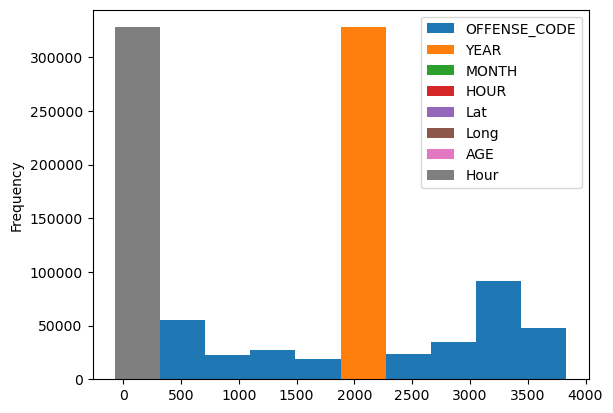

In [82]:
%matplotlib inline
df.plot(kind='hist')

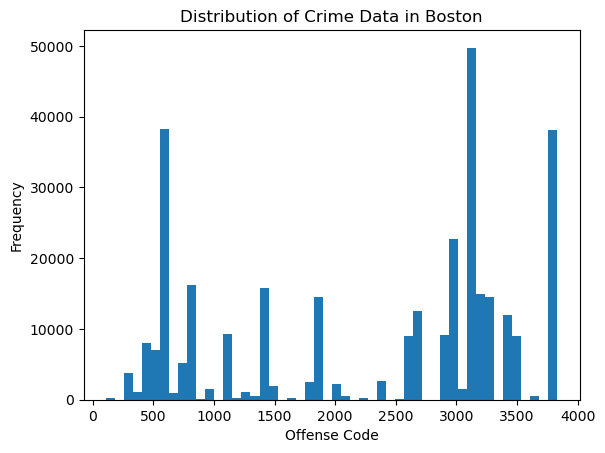

In [80]:
# Create a histogram plot for the crime data
plt.hist(df['OFFENSE_CODE'], bins=50)
plt.xlabel('Offense Code')
plt.ylabel('Frequency')
plt.title('Distribution of Crime Data in Boston')
plt.show()

### Scatter Plot

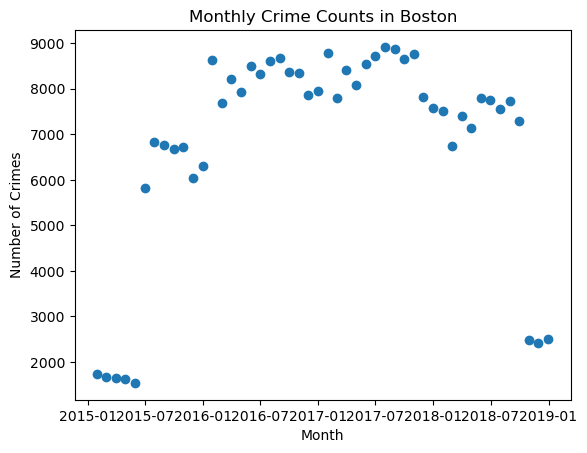

In [78]:
# Convert the 'Date' column to a datetime object
df['DATE'] = pd.to_datetime(df['DATE'])

# Group the data by month and count the number of crimes
monthly_crime_counts = df.groupby(pd.Grouper(key='DATE', freq='M')).size()

# Create a scatter plot of the monthly crime counts
plt.scatter(monthly_crime_counts.index, monthly_crime_counts.values)

# Set the title and axis labels
plt.title('Monthly Crime Counts in Boston')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')

# Display the plot
plt.show()

<Axes: >

C:\Users\admin\anaconda3\Lib\site-packages\IPython\core\events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
C:\Users\admin\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


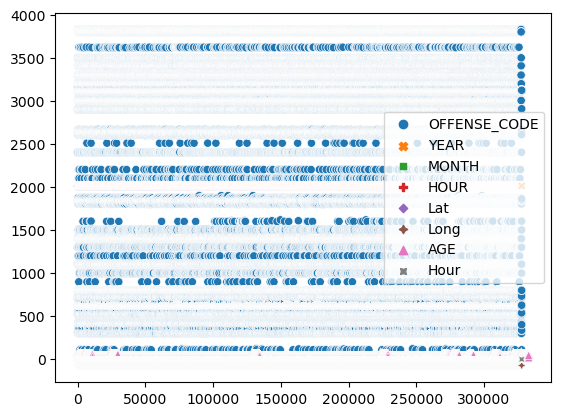

In [86]:
sns.scatterplot(data=df)

## D.Test statistic

### Test type (T-test, Z-test, F-test, ANNOVA, Chi-Square, PCA)

### T-test

In [95]:
from scipy.stats import ttest_ind

# Split the dataset into two groups
group1 = df[df['DISTRICT'] == 'D14']
group2 = df[df['DISTRICT'] == 'B2']

# Perform the t-test
t, p = ttest_ind(group1['OFFENSE_CODE'], group2['OFFENSE_CODE'])

# Print the results
print('t-value:', t)
print('p-value:', p)

t-value: 0.539141126234205
p-value: 0.5897911489474031


### Z-test

In [97]:
from scipy.stats import norm

# Split the dataset into two groups
group1 = df[df['DISTRICT'] == 'D14']
group2 = df[df['DISTRICT'] == 'B2']

# Calculate the mean and standard deviation of each group
mean1, std1 = group1['OFFENSE_CODE'].mean(), group1['OFFENSE_CODE'].std()
mean2, std2 = group2['OFFENSE_CODE'].mean(), group2['OFFENSE_CODE'].std()

# Calculate the standard error of the difference between means
se = ((std1 ** 2) / len(group1) + (std2 ** 2) / len(group2)) ** 0.5
z = (mean1 - mean2) / se

# Calculate the p-value
p = 1 - norm.cdf(abs(z))

# Print the results
print('z-value:', z)
print('p-value:', p)

z-value: 0.5323332640349271
p-value: 0.2972475987305403


### ANOVA

In [101]:
from scipy.stats import f_oneway

# Split the dataset into three groups
group1 = df[df['DISTRICT'] == 'D14']
group2 = df[df['DISTRICT'] == 'B2']
group3 = df[df['DISTRICT'] == 'A1']

# Perform the F-test
f, p = f_oneway(group1['OFFENSE_CODE'], group2['OFFENSE_CODE'], group3['OFFENSE_CODE'])

# Print the results
print('F-value:', f)
print('p-value:', p)

F-value: 482.9052727105152
p-value: 1.5978452466819632e-209


### Chi-Square

In [114]:
from scipy.stats import chi2_contingency

# Create a contingency table for crime rates by neighborhood
crime_table = df.groupby('DISTRICT')['OFFENSE_CODE'].value_counts()

# Perform the Chi-Square test
chi2_statistic, p_value, degrees_of_freedom, expected_counts = chi2_contingency(crime_table)

# Print the results
print('Chi-Square statistic:', chi2_statistic)
print('p-value:', p_value)
print('Degrees of freedom:', degrees_of_freedom)
print('Expected counts:', expected_counts)


Chi-Square statistic: 0.0
p-value: 1.0
Degrees of freedom: 0
Expected counts: [2.220e+03 1.917e+03 1.912e+03 ... 1.000e+00 1.000e+00 1.000e+00]


### PCA

In [ ]:
# Impute missing values in the age column
df['OFFENSE_CODE'] = df['OFFENSE_CODE'].fillna(df['OFFENSE_CODE'].mean())
df.head()

In [ ]:
# Impute missing values in the age column
df['AGE'] = df['AGE'].fillna(df['AGE'].mean())
df.head()

In [ ]:
from sklearn.decomposition import PCA
import numpy as np
n=['OFFENSE_CODE','AGE']
data_stats=df[n]
pca = PCA(n_components=0.9) 
principal_components = pca.fit_transform(data_stats)
num_components = pca.n_components_
num_components